In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf

2022-01-07 17:50:01.839990: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-01-07 17:50:01.840065: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
import os
import transformers

In [3]:
train = pd.read_csv("../data/train.csv")

In [4]:
train.shape

(144293, 8)

In [5]:
train.head()

,id,discourse_id,discourse_start,discourse_end,discourse_text,discourse_type,discourse_type_num,predictionstring
0,423A1CA112E2,1.622628e+12,8.0,229.0,Modern humans today are always on their phone....,Lead,Lead 1,1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 1...
1,423A1CA112E2,1.622628e+12,230.0,312.0,They are some really bad consequences when stu...,Position,Position 1,45 46 47 48 49 50 51 52 53 54 55 56 57 58 59
2,423A1CA112E2,1.622628e+12,313.0,401.0,Some certain areas in the United States ban ph...,Evidence,Evidence 1,60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75
3,423A1CA112E2,1.622628e+12,402.0,758.0,"When people have phones, they know about certa...",Evidence,Evidence 2,76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 9...
4,423A1CA112E2,1.622628e+12,759.0,886.0,Driving is one of the way how to get around. P...,Claim,Claim 1,139 140 141 142 143 144 145 146 147 148 149 15...


In [6]:
# X = train.drop(columns = "predictionstring")
# y = train.predictionstring

## Tokenization

### Importing and saving locally (not necesary, only for offline use) the model

We are using the AutoTokenizer class from HuggingFace transformers.

In [16]:
#Change with path of saved tokens if they have already been generated (optionnal)

LOAD_TOKENS_FROM = None


# Once the tokens have been generated, you can uncomment this line:
LOAD_TOKENS_FROM = "../tokens"

In [8]:
tokenizer = transformers.AutoTokenizer.from_pretrained("allenai/longformer-base-4096")

In [53]:
#Saving the model locally
if os.path.exists("../model") == False: 
    os.mkdir("../model")
tokenizer.save_pretrained('../model')

In [9]:
#Importing the vanilla configuration for the model:
config = transformers.AutoConfig.from_pretrained("allenai/longformer-base-4096")
config

LongformerConfig {
  "_name_or_path": "allenai/longformer-base-4096",
  "attention_mode": "longformer",
  "attention_probs_dropout_prob": 0.1,
  "attention_window": [
    512,
    512,
    512,
    512,
    512,
    512,
    512,
    512,
    512,
    512,
    512,
    512
  ],
  "bos_token_id": 0,
  "classifier_dropout": null,
  "eos_token_id": 2,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "ignore_attention_mask": false,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-05,
  "max_position_embeddings": 4098,
  "model_type": "longformer",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 1,
  "position_embedding_type": "absolute",
  "sep_token_id": 2,
  "transformers_version": "4.15.0",
  "type_vocab_size": 1,
  "use_cache": true,
  "vocab_size": 50265
}

In [22]:
config.save_pretrained("../model")

In [10]:
backbone = transformers.TFAutoModel.from_pretrained("allenai/longformer-base-4096")
backbone

2022-01-07 17:50:33.173433: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2022-01-07 17:50:33.196057: E tensorflow/stream_executor/cuda/cuda_driver.cc:328] failed call to cuInit: UNKNOWN ERROR (100)
2022-01-07 17:50:33.196094: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (LAPTOP-I5V260QJ): /proc/driver/nvidia/version does not exist
2022-01-07 17:50:33.196544: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
Some layers from the model checkpoint at allenai/longformer-base-4096 were not used when initializing TFLongformerModel: ['lm_head']
- This IS expected if you are initializing TFLongform

In [25]:
backbone.save_pretrained("../model")

In [11]:
#Checking Tensorflow version:

tf.__version__

'2.5.1'

### Tokenizing

### If the tokens have already been generated:

In [17]:
#Max lenght of tokens
MAX_LEN = 1024

targets = np.load(f'{LOAD_TOKENS_FROM}/targets_{MAX_LEN}.npy')
train_tokens = np.load(f'{LOAD_TOKENS_FROM}/tokens_{MAX_LEN}.npy')
train_attention = np.load(f'{LOAD_TOKENS_FROM}/attention_{MAX_LEN}.npy')
print('Loaded NER tokens')

Loaded NER tokens


In [18]:
train.head()

,id,discourse_id,discourse_start,discourse_end,discourse_text,discourse_type,discourse_type_num,predictionstring
0,423A1CA112E2,1.622628e+12,8.0,229.0,Modern humans today are always on their phone....,Lead,Lead 1,1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 1...
1,423A1CA112E2,1.622628e+12,230.0,312.0,They are some really bad consequences when stu...,Position,Position 1,45 46 47 48 49 50 51 52 53 54 55 56 57 58 59
2,423A1CA112E2,1.622628e+12,313.0,401.0,Some certain areas in the United States ban ph...,Evidence,Evidence 1,60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75
3,423A1CA112E2,1.622628e+12,402.0,758.0,"When people have phones, they know about certa...",Evidence,Evidence 2,76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 9...
4,423A1CA112E2,1.622628e+12,759.0,886.0,Driving is one of the way how to get around. P...,Claim,Claim 1,139 140 141 142 143 144 145 146 147 148 149 15...


In [14]:
#number of unique id of texts: 

IDS = len(train.id.unique())

In [17]:
train_tokens = np.zeros((IDS,MAX_LEN), dtype='int32')

#Generating an attention mask:

train_attention = np.zeros((IDS,MAX_LEN), dtype='int32')

In [32]:
#Generating tensor that will be filled with the coordinates of the start and end of the named entities.

lead_b = np.zeros((IDS,MAX_LEN))
lead_i = np.zeros((IDS,MAX_LEN))

position_b = np.zeros((IDS,MAX_LEN))
position_i = np.zeros((IDS,MAX_LEN))

evidence_b = np.zeros((IDS,MAX_LEN))
evidence_i = np.zeros((IDS,MAX_LEN))

claim_b = np.zeros((IDS,MAX_LEN))
claim_i = np.zeros((IDS,MAX_LEN))

conclusion_b = np.zeros((IDS,MAX_LEN))
conclusion_i = np.zeros((IDS,MAX_LEN))

counterclaim_b = np.zeros((IDS,MAX_LEN))
counterclaim_i = np.zeros((IDS,MAX_LEN))

rebuttal_b = np.zeros((IDS,MAX_LEN))
rebuttal_i = np.zeros((IDS,MAX_LEN))

# HELPER VARIABLES

#List of number of words in each text:
train_lens = []

targets_b = [lead_b, position_b, evidence_b, claim_b, conclusion_b, counterclaim_b, rebuttal_b]
targets_i = [lead_i, position_i, evidence_i, claim_i, conclusion_i, counterclaim_i, rebuttal_i]
target_map = {'Lead':0, 'Position':1, 'Evidence':2, 'Claim':3, 'Concluding Statement':4,
             'Counterclaim':5, 'Rebuttal':6}

In [33]:
train.id.unique()[1]

'A8445CABFECE'

In [38]:
import pdb
for unique_text in range(IDS):
#     pdb.set_trace()
    #little print between each 100 iterations:
    if unique_text%100==0: print(unique_text,', ',end='')
    
    text = train.id.unique()[unique_text]
    name = f'../data/train/{text}.txt'
    opened_text = open(name, 'r').read()
    train_lens.append( len(opened_text.split()))
    tokens = tokenizer.encode_plus(opened_text, 
                                   #max lenght of tokens
                                   max_length=MAX_LEN, 
                                   
                                   #padding = puttinh each token at the same lenght
                                   padding='max_length',
                                   
                                   #either or not we truncate the string to a certain lenght
                                   truncation=True, 
                                   
                                   #starting char and ending char for each token
                                   return_offsets_mapping=True)
    
    #Placing the value of the token start and end ids in the  train_tokens tensor:
    train_tokens[unique_text,] = tokens['input_ids']
    
    #Placing the value of the token attention_mask ids in the  train_attention tensor:
    train_attention[unique_text,] = tokens['attention_mask']
    

    

    ######################### Find the target in the text on save it in a target array ##############################
    offsets = tokens['offset_mapping']
    offset_index = 0
    df = train.loc[train.id==text]
    
    
    #Iterating through each text:
    for index,row in df.iterrows():
        start = row.discourse_start
        end = row.discourse_end
        if offset_index>len(offsets)-1:
            break
        c_ = offsets[offset_index][0]
        d_= offsets[offset_index][1]
        beginning = True
        while end>c_:
            
            if (c_>=start)&(end>=d_):
                k = target_map[row.discourse_type]
                #Assigning the correct target label for each token offset
                if beginning:
                    targets_b[k][unique_text][offset_index] = 1
                    beginning = False
                else:
                    targets_i[k][unique_text][offset_index] = 1
            offset_index += 1
            if offset_index>len(offsets)-1:
                break
            c_ = offsets[offset_index][0]
            d_ = offsets[offset_index][1]
            
    ################################################ target array generated #########################################

0 , 100 , 200 , 300 , 400 , 500 , 600 , 700 , 800 , 900 , 1000 , 1100 , 1200 , 1300 , 1400 , 1500 , 1600 , 1700 , 1800 , 1900 , 2000 , 2100 , 2200 , 2300 , 2400 , 2500 , 2600 , 2700 , 2800 , 2900 , 3000 , 3100 , 3200 , 3300 , 3400 , 3500 , 3600 , 3700 , 3800 , 3900 , 4000 , 4100 , 4200 , 4300 , 4400 , 4500 , 4600 , 4700 , 4800 , 4900 , 5000 , 5100 , 5200 , 5300 , 5400 , 5500 , 5600 , 5700 , 5800 , 5900 , 6000 , 6100 , 6200 , 6300 , 6400 , 6500 , 6600 , 6700 , 6800 , 6900 , 7000 , 7100 , 7200 , 7300 , 7400 , 7500 , 7600 , 7700 , 7800 , 7900 , 8000 , 8100 , 8200 , 8300 , 8400 , 8500 , 8600 , 8700 , 8800 , 8900 , 9000 , 9100 , 9200 , 9300 , 9400 , 9500 , 9600 , 9700 , 9800 , 9900 , 10000 , 10100 , 10200 , 10300 , 10400 , 10500 , 10600 , 10700 , 10800 , 10900 , 11000 , 11100 , 11200 , 11300 , 11400 , 11500 , 11600 , 11700 , 11800 , 11900 , 12000 , 12100 , 12200 , 12300 , 12400 , 12500 , 12600 , 12700 , 12800 , 12900 , 13000 , 13100 , 13200 , 13300 , 13400 , 13500 , 13600 , 13700 , 13800 , 

### WIP Comparison between words count and token counter, to define an optimal MAX_LEN

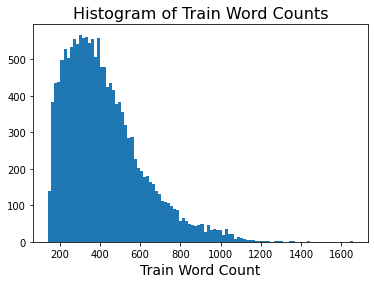

In [39]:
plt.hist(train_lens,bins=100)
plt.title('Histogram of Train Word Counts',size=16)
plt.xlabel('Train Word Count',size=14)
plt.show()

### Generating a target array (and optionnaly saving it locally)

In [52]:
#Generating a target array


## //!\\: Still not clear to me the last dimension of the array: why 15? Do we need a 15th with only 0 in it ?
# Update : for the tokens that have not been linked to a label?


if LOAD_TOKENS_FROM is None:
#     pdb.set_trace()
    targets = np.zeros((IDS,MAX_LEN,15), dtype='int32')
    for k in range(7):
        targets[:,:,2*k] = targets_b[k]
        targets[:,:,2*k+1] = targets_i[k]
    targets[:,:,14] = 1-np.max(targets,axis=-1)
    
    
if LOAD_TOKENS_FROM is None:
    if os.path.exists("../tokens") == False: 
        os.mkdir("../tokens")
    np.save(f'../tokens/targets_{MAX_LEN}', targets)
    np.save(f'../tokens/tokens_{MAX_LEN}', train_tokens)
    np.save(f'../tokens/attention_{MAX_LEN}', train_attention)
    print('Saved NER tokens')

Saved NER tokens


In [47]:
targets_b[0].shape

(15594, 1024)

## Training the model

We use the backbone we already loaded as the base of our model, and we had the last layers corresponding to our task:

In [19]:
def build_model():
    
    tokens = tf.keras.layers.Input(shape=(MAX_LEN,), name = 'tokens', dtype=tf.int32)
    attention = tf.keras.layers.Input(shape=(MAX_LEN,), name = 'attention', dtype=tf.int32)
    
    config = transformers.AutoConfig.from_pretrained('../model/config.json') 
    backbone = transformers.TFAutoModel.from_pretrained('../model/tf_model.h5', config=config)
    
    x = backbone(tokens, attention_mask=attention)
    x = tf.keras.layers.Dense(256, activation='relu')(x[0])
    x = tf.keras.layers.Dense(15, activation='softmax', dtype='float32')(x)
    
    model = tf.keras.Model(inputs=[tokens,attention], outputs=x)
    model.compile(optimizer = tf.keras.optimizers.Adam(lr = 1e-4),
                  loss = [tf.keras.losses.CategoricalCrossentropy()],
                  metrics = [tf.keras.metrics.CategoricalAccuracy()])
    
    return model

In [ ]:
model = build_model()